<a href="https://colab.research.google.com/github/vinidias/EDA-Airbnb-RJ/blob/main/EDA_RJ_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns


**Load The Data**

In [2]:
rj_df = pd.read_csv("/content/dataset_rj.csv")

In [3]:
rj_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,4,265,2021-05-21,2.07,1,314,12,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,297,3,85,2017-04-22,0.86,1,30,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.86,2,266,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,271,2,181,2019-12-06,1.92,1,151,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,121,3,371,2019-06-15,3.05,1,30,35,NaN


Drop unnecessary collumns

In [4]:
rj_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

print(rj_df.head())

   host_id  neighbourhood_group  ... number_of_reviews_ltm  license
0    68997                  NaN  ...                    12      NaN
1    99249                  NaN  ...                     0      NaN
2   102840                  NaN  ...                     0      NaN
3   153232                  NaN  ...                     0      NaN
4   153691                  NaN  ...                    35      NaN

[5 rows x 14 columns]


Replacing all NaN values in "review_per_month" with 0

In [5]:
rj_df.reviews_per_month.fillna(0, inplace=True)

print(rj_df.isnull().any())

host_id                           False
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool


**Exploration Data and Visualizing**

Neigbourhood Group


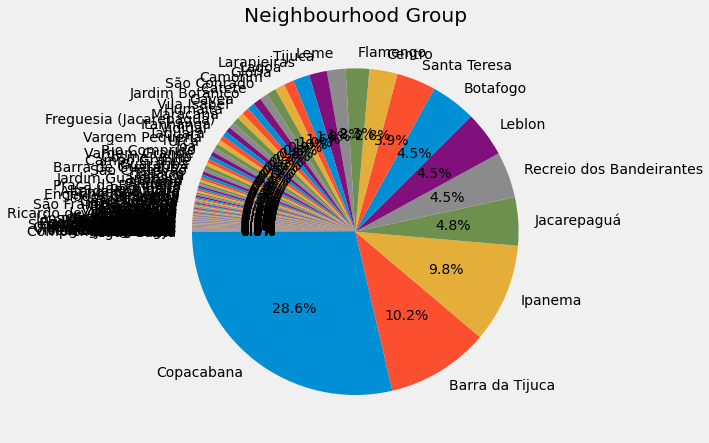

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")

g = plt.pie(rj_df.neighbourhood.value_counts(), labels=rj_df.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)

plt.show()

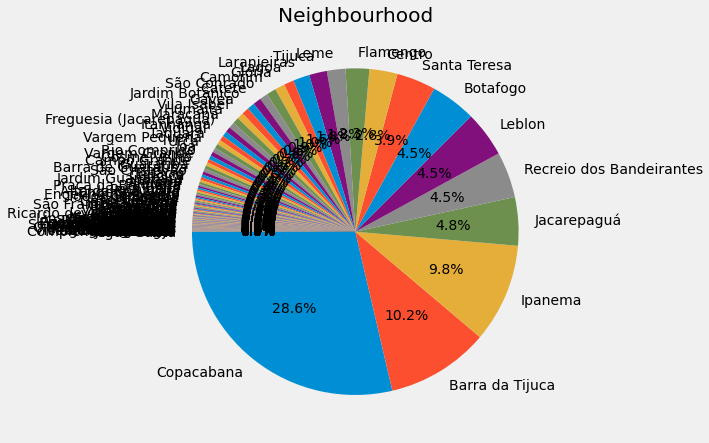

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood")
g = plt.pie(rj_df.neighbourhood.value_counts(), labels=rj_df.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Map of Neighbourhood by price


No handles with labels found to put in legend.


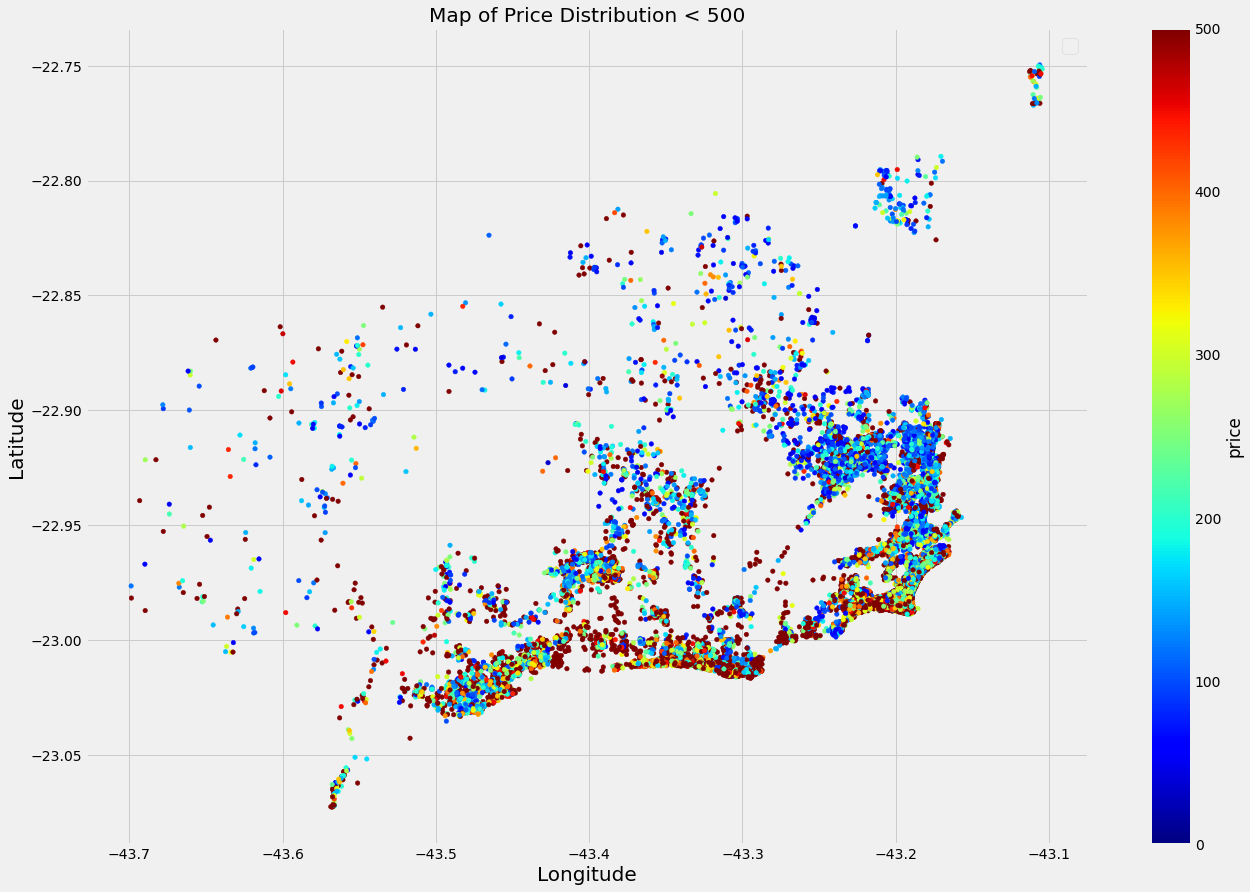

In [46]:


# plot the data
ax = rj_df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    norm = plt.Normalize(0, 500),

    colorbar=True, 
    alpha=1,
)
# use our map with it's bounding coordinates
          
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.title("Map of Price Distribution < 500")
plt.legend(fontsize=20)
plt.show()

Room Details

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


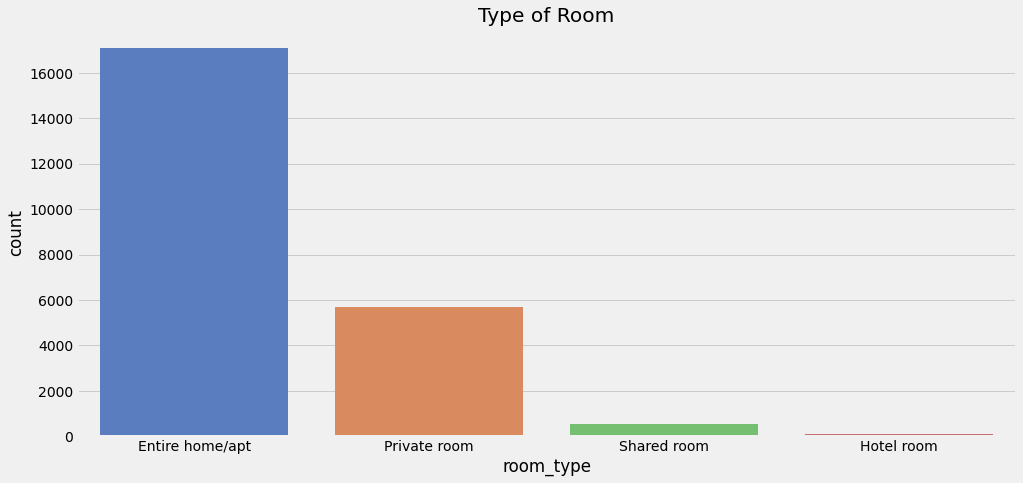

In [44]:
plt.figure(figsize=(15,7))

plt.title("Type of Room")

sns.countplot(rj_df.room_type, palette="muted")
fig = plt.gcf()

plt.show()

Price Prediction


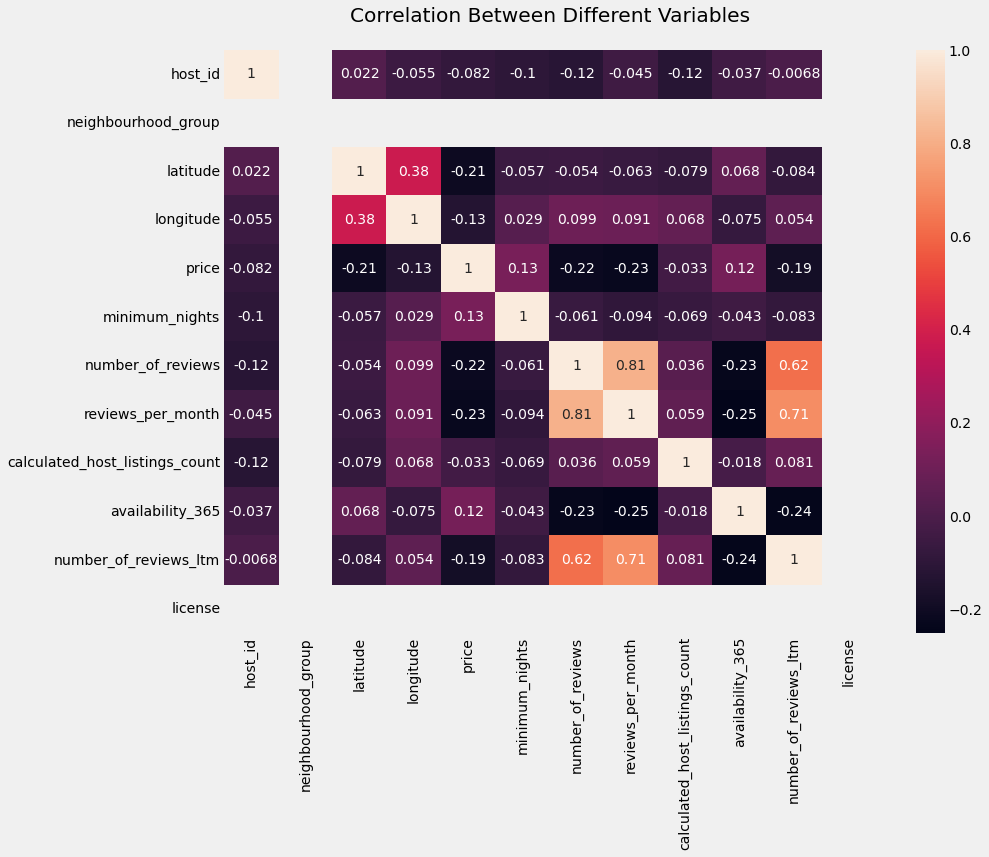

In [47]:
corr = rj_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()